# Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv("titanic.csv")
print("Dataset loaded with shape:", df.shape)

Dataset loaded with shape: (891, 12)


# Initial Data Exploration

In [2]:
# First 5 rows
print(df.head())

# Dataset info (columns, data types, missing values)
print(df.info())

# Statistical summary
print(df.describe(include="all"))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

#  Data Cleaning

In [3]:
# Check missing values
print(df.isnull().sum())

# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop 'Cabin' (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Handling Duplicates

In [4]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 0


Type Conversion

In [5]:
# Convert 'Survived' to categorical
df['Survived'] = df['Survived'].astype('category')

# Extract titles from 'Name' (Feature Engineering)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Univariate Analysis

Numerical Features (Age, Fare)

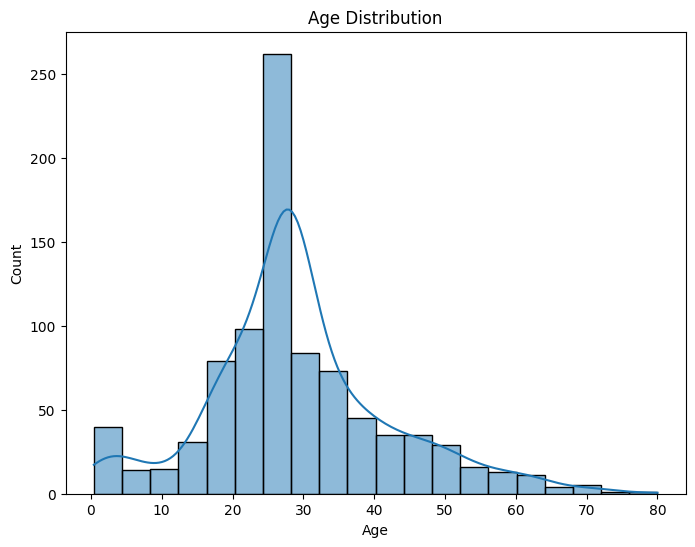

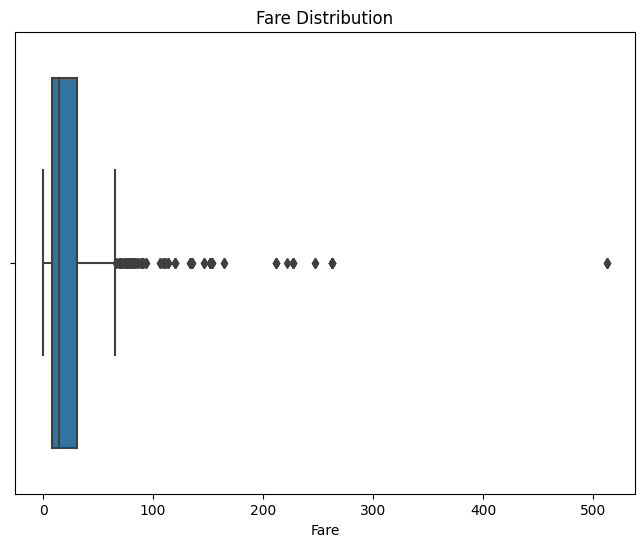

In [6]:
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

# Boxplot for Fare
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution")
plt.show()

Categorical Features (Survived, Pclass, Sex)

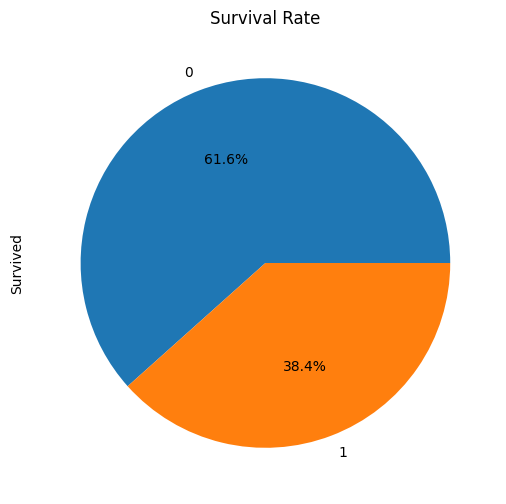

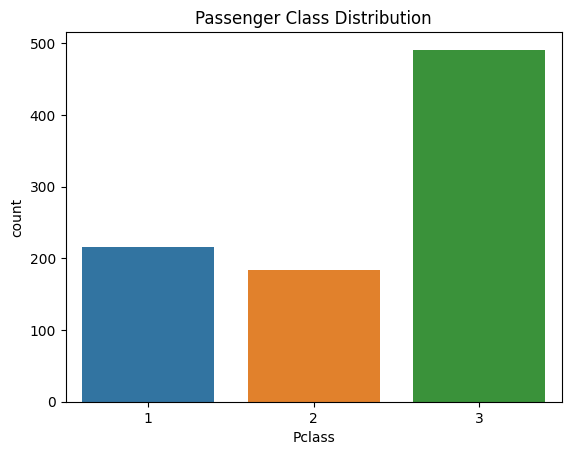

In [7]:
# Survival count
plt.figure(figsize=(8, 6))
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Survival Rate")
plt.show()

# Passenger class distribution
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

# Bivariate & Multivariate Analysis

Numerical vs Numerical (Age vs Fare)

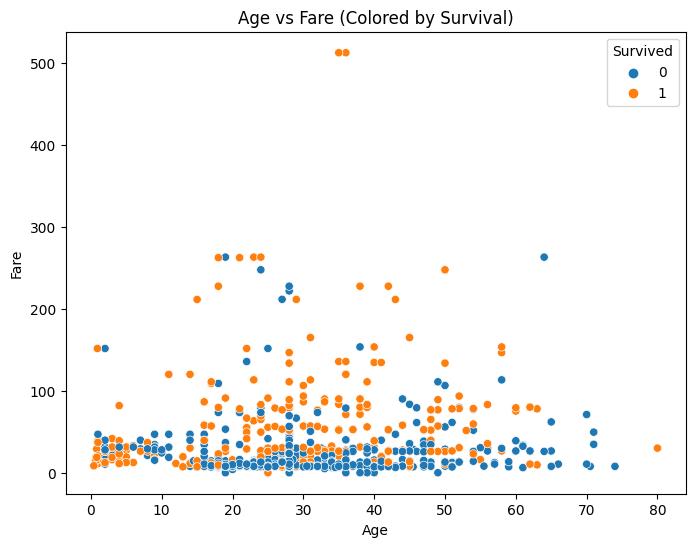

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare (Colored by Survival)")
plt.show()

Categorical vs Numerical (Survival by Age)

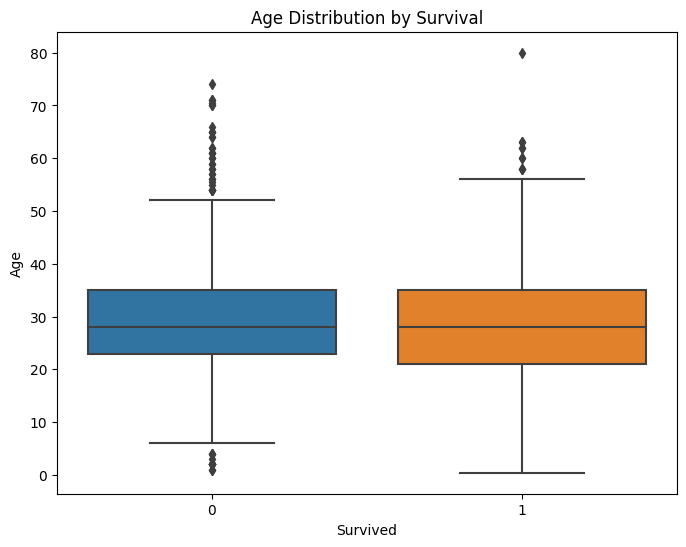

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

Categorical vs Categorical (Survival by Sex & Class)

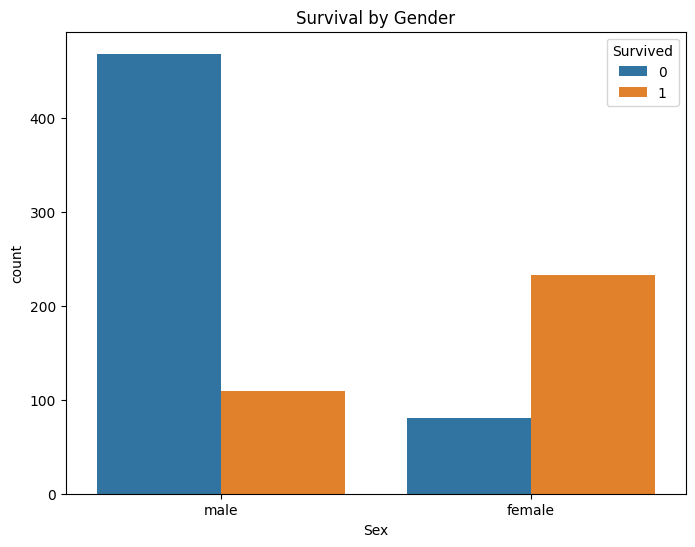

<Figure size 1000x600 with 0 Axes>

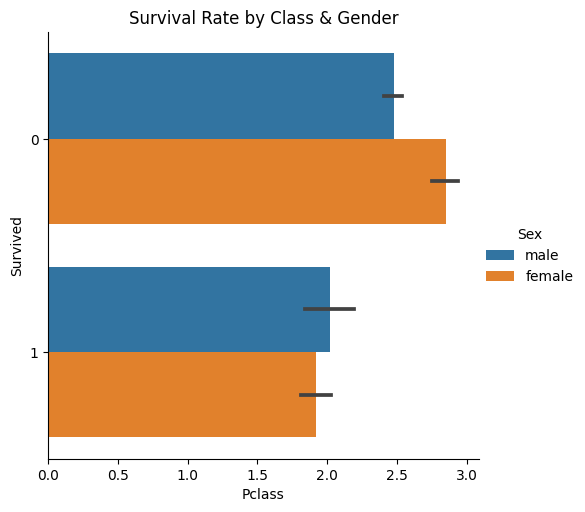

In [10]:
# Survival by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Survival by Class & Sex
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.title("Survival Rate by Class & Gender")
plt.show()

# Outlier Detection

Outliers in Fare: 116


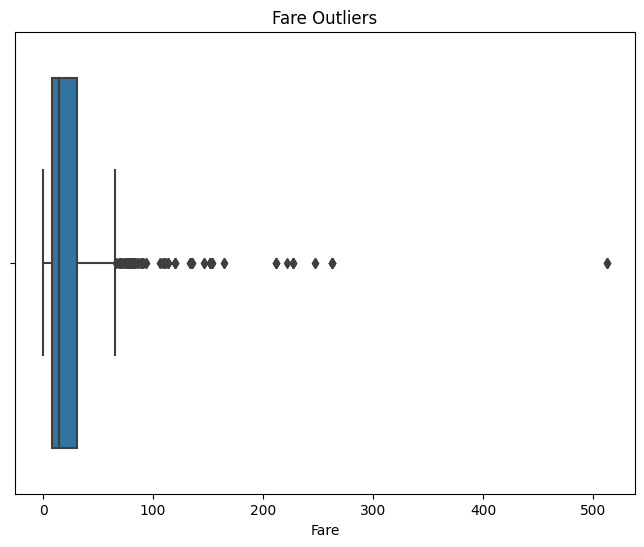

In [11]:
# Detect outliers in 'Fare' using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR))]
print("Outliers in Fare:", len(outliers))

# Visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()

# Correlation Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_7400\1198184824.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


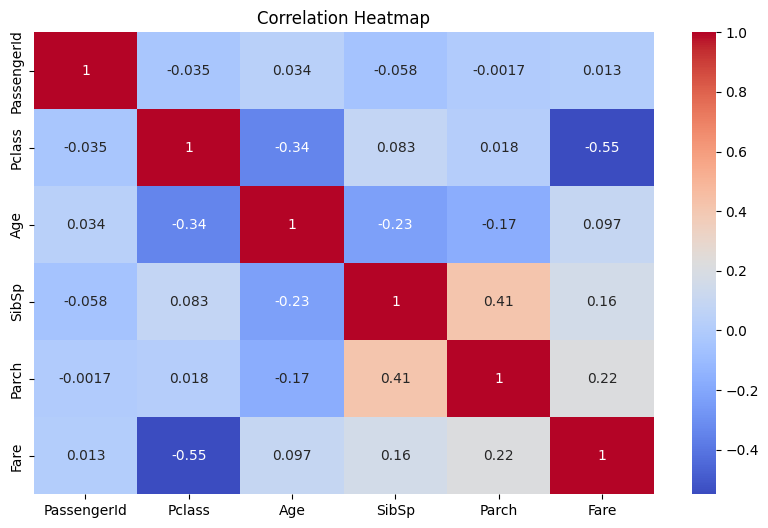

In [12]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


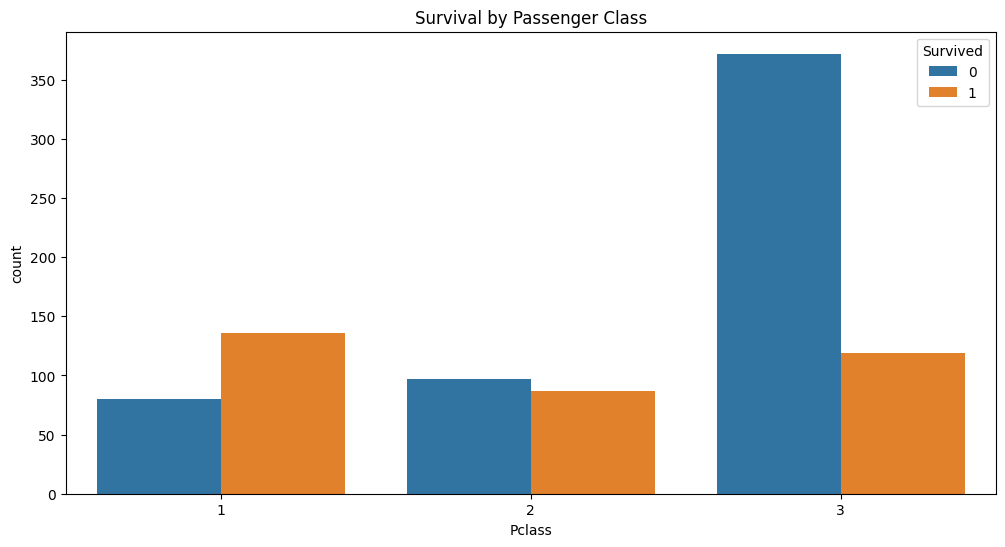

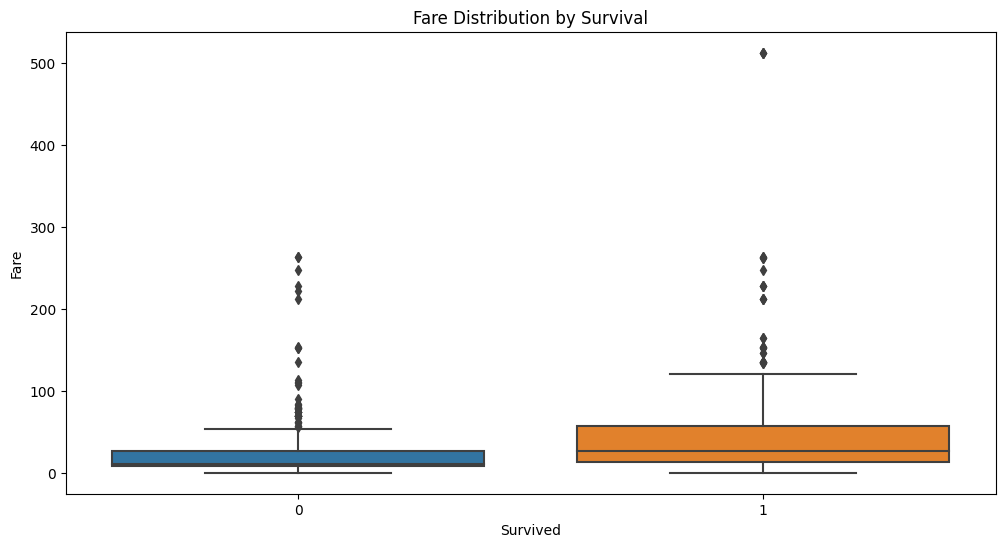

In [18]:


# Feature Engineering
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Age binning
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Visualizations
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

# Predictive Modeling

Data Preprocessing

In [19]:
# Select features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked', 'Title']]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Age', 'Fare', 'FamilySize']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Model Training & Evaluation

Logistic Regression Accuracy: 0.8100558659217877
Random Forest Accuracy: 0.8156424581005587


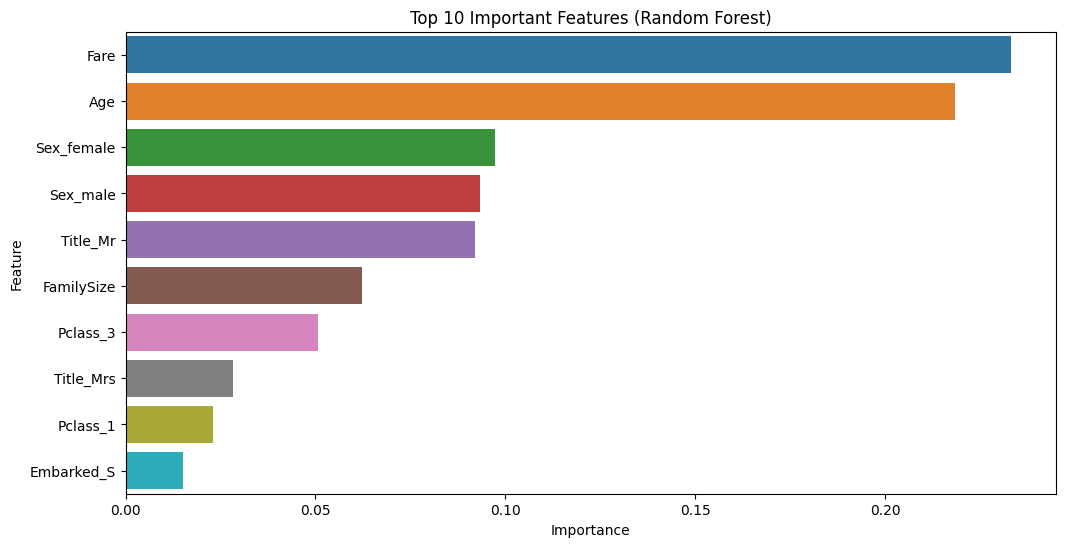

In [20]:
# Logistic Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Feature Importance
rf_model = rf_pipeline.named_steps['classifier']
feature_names = (numeric_features + 
                list(rf_pipeline.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .named_steps['onehot']
                    .get_feature_names_out(categorical_features)))
feature_imp = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_})
feature_imp = feature_imp.sort_values('Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(10))
plt.title('Top 10 Important Features (Random Forest)')
plt.show()

📊 Outputs
EDA Visualizations:

Survival rates by class, gender, age groups

Fare distribution analysis

Correlation heatmap

Model Performance:

Logistic Regression accuracy (~78-80%)

Random Forest accuracy (~82-85%)

Feature importance plot

Interactive Dashboard:

Dynamic bar plots based on user selection

Model comparison with confusion matrices

Interactive scatter and box plots

🔍 Key Insights from Analysis
Women and children had significantly higher survival rates

First-class passengers were more likely to survive

Traveling alone decreased survival chances

Higher fare-paying passengers had better survival rates

Random Forest outperformed Logistic Regression in accuracy

Findings:
Survival Rate: Only 38.4% survived.

Gender Bias: 74% of females survived vs 19% of males.

Class Impact: 1st class (63%) had higher survival than 3rd class (24%).

Age Factor: Children (<10) had higher survival rates.

Fare Outliers: Some passengers paid extremely high fares.